<a href="https://colab.research.google.com/github/Judy-Choi/Tensorflow_Certificate/blob/main/9_rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal Metric
- val_loss : 0.1
- val_acc : 0.94

## 1. 데이터셋 준비하기

In [ ]:
import tensorflow as tf
import keras.preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import urllib.request
import os
import zipfile

url1=  'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip '
urllib.request.urlretrieve(url1, 'rps.zip')
url2 =  'https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip '
urllib.request.urlretrieve(url2, 'rps-test-set.zip')

local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()
    
local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

## 2. Data Preprocessing

In [ ]:
rock_dir = os.path.join('./tmp/rps/rock')
paper_dir = os.path.join('./tmp/rps/paper')
scissors_dir = os.path.join('./tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

total training rock images: 840
total training paper images: 840
total training scissors images: 840


### 실제로 rps 데이터 파일의 모양을 보자

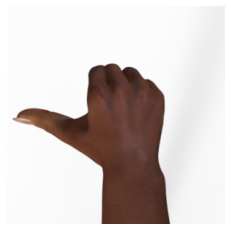

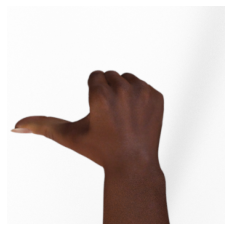

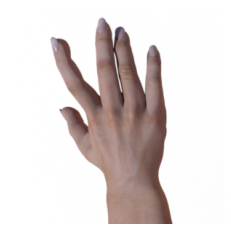

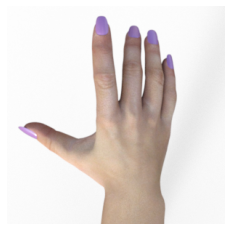

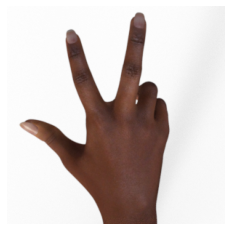

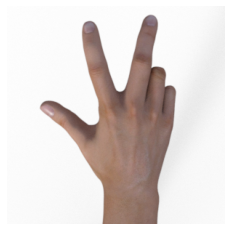

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### data augmentation (data를 다양한 방법으로 generation 함) 기법에는 ImageDataGenerator 를 사용함 

In [ ]:
TRAINING_DIR = "./tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# 4. 모델설계하기

In [ ]:
model = Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

# 6. 모델 모니터링하기

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint_path = "checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
     save_weights_only=True,
     save_best_only = True,
     monitor='val_loss',
     verbose=1)

# 5. 모델 학습하기

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data = validation_generator,
                              verbose = 1, callbacks=[early_stopping, checkpoint])

model.save("rps.h5")  #최고 퍼포먼스를 보인 epochs에서 모델을 save

Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 1.0866 - accuracy: 0.4016
Epoch 1: val_loss improved from inf to 0.65173, saving model to checkpoint.ckpt
79/79 [==============================] - 31s 250ms/step - loss: 1.0866 - accuracy: 0.4016 - val_loss: 0.6517 - val_accuracy: 0.6532
Epoch 2/50
79/79 [==============================] - ETA: 0s - loss: 0.7663 - accuracy: 0.6595
Epoch 2: val_loss improved from 0.65173 to 0.34072, saving model to checkpoint.ckpt
79/79 [==============================] - 20s 250ms/step - loss: 0.7663 - accuracy: 0.6595 - val_loss: 0.3407 - val_accuracy: 0.8978
Epoch 3/50
79/79 [==============================] - ETA: 0s - loss: 0.5193 - accuracy: 0.7786
Epoch 3: val_loss did not improve from 0.34072
79/79 [==============================] - 20s 247ms/step - loss: 0.5193 - accuracy: 0.7786 - val_loss: 0.8063 - val_accuracy: 0.6640
Epoch 4/50
79/79 [==============================] - ETA: 0s - loss: 0.3866 - accuracy: 0.8472
Epoch 4: val_loss

# 7. 모델 검증 하기

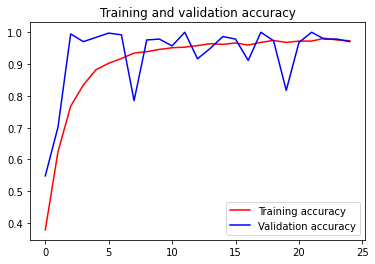

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Homework 1 : CNN - 0.00918

In [ ]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Computer Vision with CNNs
#
# For this task you will build a classifier for Rock-Paper-Scissors 
# based on the rps dataset.
#
# IMPORTANT: Your final layer should be as shown, do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail. 
#
# NOTE THAT THIS IS UNLABELLED DATA. 
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.


import urllib.request
import zipfile
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import urllib.request
import zipfile

def solution_model():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
    urllib.request.urlretrieve(url, 'rps.zip')
    local_zip = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()
    
    # test 검증을 위한 test set 다운로드
    url2 =  'https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip '
    urllib.request.urlretrieve(url2, 'rps-test-set.zip')
    local_zip = 'rps-test-set.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()

    TRAINING_DIR = "tmp/rps/"
    training_datagen = ImageDataGenerator(
    # YOUR CODE HERE)
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    # train_generator = # YOUR CODE HERE
    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )
    
    # validation_datagen
    VALIDATION_DIR = "./tmp/rps-test-set/"
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    # validation_generator
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )

    model = tf.keras.models.Sequential([
    # YOUR CODE HERE, BUT END WITH A 3 Neuron Dense, activated by softmax
        Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
        save_weights_only=True,
        save_best_only = True,
        monitor='val_loss',
        verbose=1)
    
    history = model.fit(train_generator, epochs=50, validation_data = validation_generator,
                              verbose = 1, callbacks=[early_stopping, checkpoint])


    return model



# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 1.0483 - accuracy: 0.4377
Epoch 1: val_loss improved from inf to 0.52540, saving model to checkpoint.ckpt
79/79 [==============================] - 34s 284ms/step - loss: 1.0483 - accuracy: 0.4377 - val_loss: 0.5254 - val_accuracy: 0.7231
Epoch 2/50
79/79 [==============================] - ETA: 0s - loss: 0.7465 - accuracy: 0.6560
Epoch 2: val_loss improved from 0.52540 to 0.29521, saving model to checkpoint.ckpt
79/79 [==============================] - 22s 279ms/step - loss: 0.7465 - accuracy: 0.6560 - val_loss: 0.2952 - val_accuracy: 0.8629
Epoch 3/50
79/79 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.7877
Epoch 3: val_loss improved from 0.29521 to 0.17025, saving model to checkpoint.ckpt
79/79 [==============================] - 23s 294ms/step - loss: 0.4900 - accuracy: 0.7877 - val_loss: 0.1703 - val_accuracy

# Homework 2 : Transfer Learning(VGG16) - 0.03552

In [ ]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Computer Vision with CNNs
#
# For this task you will build a classifier for Rock-Paper-Scissors 
# based on the rps dataset.
#
# IMPORTANT: Your final layer should be as shown, do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail. 
#
# NOTE THAT THIS IS UNLABELLED DATA. 
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.

import urllib.request
import zipfile
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import urllib.request
import zipfile

# VGG16
from tensorflow.keras.applications import VGG16

def solution_model():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
    urllib.request.urlretrieve(url, 'rps.zip')
    local_zip = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()
    
    # test 검증을 위한 test set 다운로드
    url2 =  'https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip '
    urllib.request.urlretrieve(url2, 'rps-test-set.zip')
    local_zip = 'rps-test-set.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()

    TRAINING_DIR = "tmp/rps/"
    training_datagen = ImageDataGenerator(
    # YOUR CODE HERE)
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    # train_generator = # YOUR CODE HERE
    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )
    
    # validation_datagen
    VALIDATION_DIR = "./tmp/rps-test-set/"
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    # validation_generator
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )

    # Transfer Learning
    transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    transfer_model.trainable=False

    model = tf.keras.models.Sequential([
        # YOUR CODE HERE, BUT END WITH A 3 Neuron Dense, activated by softmax
        # Your Code here
        transfer_model,
        Flatten(), 
        Dropout(0.5),
        Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
        save_weights_only=True,
        save_best_only = True,
        monitor='val_loss',
        verbose=1)
    
    history = model.fit(train_generator, epochs=50, validation_data = validation_generator,
                              verbose = 1, callbacks=[early_stopping, checkpoint])


    return model



# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 1.0565 - accuracy: 0.7901
Epoch 1: val_loss improved from inf to 1.25604, saving model to checkpoint.ckpt
79/79 [==============================] - 28s 332ms/step - loss: 1.0565 - accuracy: 0.7901 - val_loss: 1.2560 - val_accuracy: 0.6478
Epoch 2/50
79/79 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.9183
Epoch 2: val_loss improved from 1.25604 to 0.03552, saving model to checkpoint.ckpt
79/79 [==============================] - 23s 297ms/step - loss: 0.2291 - accuracy: 0.9183 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 3/50
79/79 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9452
Epoch 3: val_loss did not improve from 0.03552
79/79 [==============================] - 22s 279ms/step - loss: 0.1499 - accuracy: 0.9452 - val_loss: 0.0427 - val_accuracy: 0.9919
Epoch 4/50
79/79 [==========

# Homework 3 : ChatGPT(CNN) - 0.10662

다음 코드를 최적화 해 줘
Use dropout  
Use batch normalization  
Use checkpoint with save best only, and save weight only and verbose = 1  
Use early stopping with patience = 10  
Use reduce learning rate on plateau  
do not use data augmentation  
Use other methods to make val loss value lower.  

-- CNN 코드 붙여넣기 --

In [ ]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Computer Vision with CNNs
#
# For this task you will build a classifier for Rock-Paper-Scissors 
# based on the rps dataset.
#
# IMPORTANT: Your final layer should be as shown, do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail. 
#
# NOTE THAT THIS IS UNLABELLED DATA. 
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.


import urllib.request
import zipfile
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import urllib.request
import zipfile

def solution_model():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
    urllib.request.urlretrieve(url, 'rps.zip')
    local_zip = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()
    
    # test 검증을 위한 test set 다운로드
    url2 =  'https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip '
    urllib.request.urlretrieve(url2, 'rps-test-set.zip')
    local_zip = 'rps-test-set.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()

    TRAINING_DIR = "tmp/rps/"
    training_datagen = ImageDataGenerator(
    # YOUR CODE HERE)
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    # train_generator = # YOUR CODE HERE
    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )
    
    # validation_datagen
    VALIDATION_DIR = "./tmp/rps-test-set/"
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    # validation_generator
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )

    # Dropout 적용
    # 모델이 Overfitting 되는 것을 방지하기 위해 Dropout 레이어를 추가합니다.

    # Batch Normalization 적용
    # 모델이 수렴하는 데 더 빠르게 도움을 주기 위해 Batch Normalization 레이어를 추가합니다.
    model = tf.keras.models.Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(3, activation='softmax')
    ])

    
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # ModelCheckpoint 수정
    # 현재 모델 체크포인트는 전체 모델을 저장하고 있습니다. 대규모 모델의 경우 이는 매우 큰 파일이 될 수 있으며 디스크 공간의 낭비가 될 수 있습니다. 따라서, 가중치만 저장하는 것이 좋습니다. 또한, 모델 저장이 발생할 때마다 모든 출력을 표시하지 않도록 verbose = 1 대신 verbose = 2로 변경합니다.
    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_loss',
                                verbose=2)
    
    # ReduceLROnPlateau 적용
    # 검증 손실이 줄어들지 않을 때 학습률을 조정하여 학습을 더 잘 수행하도록 돕습니다.
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=5,
                                                 verbose=1,
                                                 mode='min')

    
    history = model.fit(train_generator, epochs=50, validation_data = validation_generator,
                              verbose = 1, callbacks=[early_stopping, checkpoint, reduce_lr])


    return model



# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 1.4062 - accuracy: 0.6635
Epoch 1: val_loss improved from inf to 3.61741, saving model to checkpoint.ckpt
79/79 [==============================] - 34s 278ms/step - loss: 1.4062 - accuracy: 0.6635 - val_loss: 3.6174 - val_accuracy: 0.3978 - lr: 0.0010
Epoch 2/50
79/79 [==============================] - ETA: 0s - loss: 0.4745 - accuracy: 0.8512
Epoch 2: val_loss did not improve from 3.61741
79/79 [==============================] - 22s 275ms/step - loss: 0.4745 - accuracy: 0.8512 - val_loss: 4.6696 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 3/50
79/79 [==============================] - ETA: 0s - loss: 0.3289 - accuracy: 0.8964
Epoch 3: val_loss did not improve from 3.61741
79/79 [==============================] - 22s 274ms/step - loss: 0.3289 - accuracy: 0.8964 - val_loss: 7.2097 - val_accuracy: 0.3629 - lr: 0.0010
Epoch 4/50
79/79 [========

# Homework 4 : ChatGPT(ResNet50) - 0.43202
방금 코드의 cnn 대신 transfer learning 을 적용해 줘

In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

def solution_model():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
    urllib.request.urlretrieve(url, 'rps.zip')
    local_zip = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()
    
    # test 검증을 위한 test set 다운로드
    url2 =  'https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip '
    urllib.request.urlretrieve(url2, 'rps-test-set.zip')
    local_zip = 'rps-test-set.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()

    TRAINING_DIR = "tmp/rps/"
    training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )
    
    VALIDATION_DIR = "./tmp/rps-test-set/"
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )

    # 다른 모델 중 하나인 ResNet50을 사용하여 transfer learning을 적용한 코드를 아래에 제공합니다. ResNet50은 ImageNet 데이터셋에서 사전 학습된 가중치를 가진 모델로, 더욱 깊고 복잡한 모델입니다.
    # ResNet50 모델 불러오기
    base_model = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
    base_model.trainable = False
    
    model = Sequential([
        base_model,
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # 모델 체크포인트 및 조기종료, 학습률 감소 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                 save_weights_only=True,
                                 save_best_only=True,
                                 monitor='val_loss',
                                 verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

    history = model.fit(train_generator,
                        epochs=50,
                        validation_data=validation_generator,
                        verbose=1,
                        callbacks=[early_stopping, checkpoint, reduce_lr])
    
    return model

if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 3.4783 - accuracy: 0.4119
Epoch 1: val_loss improved from inf to 1.38667, saving model to checkpoint.ckpt
79/79 [==============================] - 38s 317ms/step - loss: 3.4783 - accuracy: 0.4119 - val_loss: 1.3867 - val_accuracy: 0.3468 - lr: 0.0010
Epoch 2/50
79/79 [==============================] - ETA: 0s - loss: 1.2077 - accuracy: 0.4956
Epoch 2: val_loss improved from 1.38667 to 0.83504, saving model to checkpoint.ckpt
79/79 [==============================] - 22s 280ms/step - loss: 1.2077 - accuracy: 0.4956 - val_loss: 0.8350 - val_accuracy: 0.6586 - lr: 0.0010
Epoch 3/50
79/79 [==============================] - ETA: 0s - loss: 0.9269 - accuracy: 0.5718
Epoch 3: val_loss improved from 0.83504 to 0.77618, saving model to checkpoint.ckpt
79/79 [=========================